In [1]:
from ipywidgets import *
import cards_sol_3 as cardsPY
from ipywidgets import interact, interactive, fixed, interact_manual, SelectMultiple
import pandas as pd
import seaborn as sns



# Basic GUIs With Widgets

Almost every piece of software that you ever use outside of your own programming likely has some kind of user interface. Creating a graphical user interface (GUI) is something that is not super prevalent in data science, but is extremely common in other domains. For data science purposes we mostly work on the back end, particularly as we learn, but in real scenarios it is likely that whatever we create will need to be presented to someone somehow. This may take the form of a dashboard, web application, or something else, but the basic principles of a user interface are the same.

## Widgets

We are not making a full-blown GUI here, we will instead use ipywidgets to work within our notebook pages to create some interactive elements. This will allow us to create some simple GUIs that we can use to interact with our game. 

The widgets library can be thought of roughly as fulfilling the same role as dynamic HTML or old flash apps on webpages. We can create the basic elements of a GUI such as buttons, menus, textboxes, and so on. We can then add functionality to these elements to make them interactive. The widgets library is not the only way to create GUIs in Python, but it is a very simple way to get started. There is much, much more to both GUIs and widgets than this small example, but this should give you a taste of what is possible.

The widget documentation page is here: https://ipywidgets.readthedocs.io/en/latest/ and has a reasonable set of documentation and examples. There are lists of all the different types of widgets and examples of their use and look - for the most part, there is a lot of overlap in how they all work, so once you get the hang of one, you can use them all.

<b>Note: reference the documentation for most things here, it is excellent practice and very low stakes in this scenario. As we've mentioned, getting used to reading documentation, looking at some examples, and adapting them to your needs is a very important skill to develop as it allows you to tackle almost anything. </b>

There are a lot of widgets... a lot. We will only use a few here, but you can explore the documentation to see what else is available.

In [2]:
sample_labels = Label(value='Sample Size')
sample = IntSlider(min=1, max=1000, step=1, value=100, description='Sample Size')
check = Checkbox(value=False, description='Show Sample')
button = Button(description='Run Simulation')

hb = HBox([sample_labels, sample, check, button])
display(hb)

# sample = 700

In [3]:
print(sample.value)

100


### Prepare Code for GUI

We will need to (potentially) modify some things to make what we wrote work with a GUI for the card game. This isn't something where we need to meet some specific requirements, but the way that code works when it is run behind the scenes is somewhat different than the way code runs when we are actively using it. In particular, one key difference in when things happen:
<ul>
<li> In a normal program without user interaction, the code runs from top to bottom, in the order that it is written and/or called. </li>
<li> In a GUI, the code runs in response to user interaction. </li>
</ul>

So our general assumption that things happen in order isn't wrong, but the details have changed, so we can adapt. In particular, we can think of things in terms of user actions - when a user clicks a button, changes a value, or opens a menu, that should trigger some stuff to happen. We can think of this as a "callback" - the user does something, and that triggers a function to be called. We'll use callbacks later in machine learning to trigger actions like writing to a log, saving data, or plotting results while we leave a model to train, potentially for hours or days in real examples. 

In our card game, we can approach things similarly. I've thought about the code in the .py file in terms of functionality - each function we added increased the capability of our game to function. With a user actually playing, we can think of things in terms of user actions - like clicking a button. Each of the user actions might not map one-to-one with functionality that we've created before. Therefore, we may need to call more than one function for a user action, or split some actions that we've already written into multiple functions.

One rule of thumb that I will follow here is something that we can generally follow in most cases - write one function that equates to each user action, such as a button click. As well, I will think of where the action is "coming from" or where it is being initiated. This is often not a huge concern for backend things as they just run, but for something that is run by a user, we need to consider it. For this game, we can have things "coming from" two types of sources:
<ul>
<li> A user </li>
    <ul>
    <li> In our case, this will be from our UI.</li>
    <li> We also need to consider other players if we plan to make a complete working game. For us, I can add default values, or pretend to be Player 2. For a real application you'd likely want to have an interface that accepts player actions, and can receive them from different sources. In effect, you'd create an API for interacting with the system. </li>
    </ul>
<li> The computer </li>
    <ul>
    <li> Other actions can be based on time or circumstance, for example, after the final player has played the dealer position needs to decide a winner. This is an action that isn't (directly) initiated by a user. </li>
    </ul>
</ul>

Different things will need to be accessible to different drivers of that actions, that may impact how we have things designed as some functions might make more sense being in different places, and some may even move from one class to another. 

### Registrations and Callbacks

We will need to register our functions as callbacks for the widgets that we create. This is a fancy way of saying that we need to tell the widgets library that when a user clicks a button, we want a specific function to be called. We can do this by using the `on_click` method of the button widget. This method takes a function as an argument, and will call that function when the button is clicked.

This approach is common in many cases where we are interacting with a person or listening for something to occur. We can think of it as a "listener" - we are listening for something to happen, and when it does, we want to do something. In this case, we are listening for a button to be clicked, and when it is, we want to do something.

### Action Functions

We will need to create some functions that will be called when a user clicks a button, or that would be called when any other action is triggered. These functions are "registered" to the widget, or whatever else drives them, and are automatically called when the action occurs. Here we have a function to update the label value based on the other values in the widgets. This function is called when the button is clicked, and the label is updated with the new value.

If we look at the code that is in this example, one thing that you'll probably notice is that we have many functions that violate our general rule of only acting on the arguments, and not relying on code elsewhere in the program. This is something that is a common exemption to that "rule" - in effect, the entire program is acting as a single function, and we are just breaking it up into smaller pieces. This is a common approach in GUIs, and though it isn't universal, it does tend to make things easier to deal with, especially when starting. 

In [4]:
test_label = widgets.Label(value="Test")
combo_box = widgets.Dropdown(options=['1', '2', '3'], value='2', description='Number:')
text_box = widgets.Text(value='Hello World!', description='Text:', disabled=False)
button = widgets.Button(description='Click Me!')

def on_test_clicked(b):
    test_label.value = "Clicked:" + combo_box.value + ":" + text_box.value
button.on_click(on_test_clicked)

box1 = VBox([test_label, combo_box, text_box, button])
display(box1)

### Game Design for GUI

I will make the following changes to the backend to let things work with a GUI:

<ul>
<li> The FiveCardDraw class will the "the game" that lives in this code as an object. </li>
<li> Therefore, I will structure most/all function calls to be on that game object. </li>
    <ul>
    <li> Actions that I called directly on cards, hands, or players before will likely now be called on the game object and passed down to the appropriate object. </li>
    <li> This approach works well with the idea of a GUI, as we can have a single object that represents the game and can be "played" by sending actions and receiving responses from that object. Those inputs can come from our GUI here, but it would be easy to accept them from another GUI, a remote computer, or even a web interface. </li>
    </ul>
<li> I will need to think of a consistent way to interface with the players, banks, and hands from the outside. This is more of a usability thing than a strict requirement, as we want things to make sense. We can also revise this as we clean things up, particularly if we are working in an agile fashion, as I have been. </li>
    <ul>
    <li> My first thought is to have a list with each player number as the index, and each action (bet, swap cards, etc...) takes in the player number, or the list of player numbers as an argument. </li>
    </ul>
</ul>

<b>Note:</b> for this example I'll do one round of betting only, so deal, bet/exchange, determine winner. 

For example, here's one function that I made to make the backend code work more smoothly with the GUI interface. This function is made to translate from the GUI to what we have in our code - it takes in two lists of the changes that make up one round, what cards to swap, and how much to bet. Since if a game of poker with real people works largely in rounds, this makes sense, everyone does their stuff, then that stuff all is sent in to the game object, and this new function will do the work on modifying the state. 

![New Function](../../images/new_method.png "New Function")
![New Function](../images/new_method.png "New Function")

#### Interim Notes

This current version is somewhat messy and incomplete, that's normal and somewhat expected. Remember, we're trying to work through our initial solution incrementally and add a bit of functionality at a time. Translating something to be based on a GUI interface is a big change, so we can expect to have some issues. Here, we'll aim to accomplish a few things:
<ul>
<li> Show cards for one player. </li>
<li> Allow betting. </li>
<li> Allow swapping cards. </li>
<li> Determine winner. </li>
</ul>

For now I'll try to get one round of the game working and displaying for one user, us. This is a small step, but a large one behind the scenes. 

Next time, we can try to bring it to a reasonably logical conclusion:
<ul>
<li> Clean this UI up a bit. </li>
<li> Allow for several rounds back to back. (Loop the main code here?) </li>
<li> Display the other player's cards and bank. </li>
<li> Maybe - allow for multiple players (all manually controlled) </li>
<li> If we're feeling motivated, improve the comparisons to make the winner determination more robust. </li>
</ul>

The important thing here is to get some more experience working on complex code, which I acknowledge may be tricky for many of you right now, as well as to practice working from documentation and getting exposure to the idea of callbacks. The details of using widgets isn't super important. 

In [5]:
# Placeholder to help us always get 
# the first player. 
PLAYER = 0

##### Setup Game Object

The first thing we need to do is to setup a game object so it can be "played". We can do this here, then "launch" the UI part with the game existing. 

In [6]:
game = cardsPY.FiveCardDraw()
game.deal()
tmp_hands = game.getHands()


##### Create UI

We can make a simple UI here by specifying the items we want, creating functions for actions, and displaying all that. Here I'll focus on one thing only - a round of one betting step, with one player here (visible to us). The other steps are looping/repeating this core - we do repetitive rounds of betting, repetitive rounds of new hands, and displaying several panels of cards.

In [7]:
# Action functions for callbacks
def onSubmitButtonClicked(b):

    swap_list = [card1Button.value, card2Button.value, card3Button.value, card4Button.value, card5Button.value]

    swaps = [swap_list]
    bets = [bet_amount.value]
    game.submit(swaps, bets)

    new_hand = game.getHands()
    wins = game.calculateWinner()
    for i, but in enumerate(buttonBox.children):
        but.description = str(new_hand[0][i])
        but.value = False
    bank_label.value = str(game.getBank(PLAYER))
    if wins == PLAYER:
        win_label.value = "WINNER"
    
def forceUpdate(button):
    game.deal()
    tmp_hands = game.getHands()
    tmp_hand = tmp_hands[0]
    for i, but in enumerate(buttonBox.children):
        but.description = str(tmp_hands[PLAYER][i])
        but.value = False
    #print(wins)
    bank_label.value = str(game.getBank(PLAYER))
    win_label.value = "No Winner"    

# Create items
card1Button = ToggleButton(description=tmp_hands[PLAYER][0], value=False)
card2Button = ToggleButton(description=tmp_hands[PLAYER][1], value=False)
card3Button = ToggleButton(description=tmp_hands[PLAYER][2], value=False)
card4Button = ToggleButton(description=tmp_hands[PLAYER][3], value=False)
card5Button = ToggleButton(description=tmp_hands[PLAYER][4], value=False)

buttonBox = VBox([card1Button, card2Button, card3Button, card4Button, card5Button])
display(buttonBox)

bet_amount = IntSlider(min=0, max=100, step=1, value=0)
display(bet_amount)

submit = Button(description='Submit')
submit.on_click(onSubmitButtonClicked)
display(submit)
    
update = Button(description="New Deal")
update.on_click(forceUpdate)
display(update)

bank_label = Label(value=str(game.getBank(PLAYER)))
display(bank_label)

win_label = Label(value="No Winner")
display(win_label)

IntSlider(value=0)

Button(description='Submit', style=ButtonStyle())

Button(description='New Deal', style=ButtonStyle())

Label(value='1000')

Label(value='No Winner')

## Exercise

Try to build a simple widget-GUI to load a file, and make a scatterplot with a selector for each axis. There is a good example here: https://stackoverflow.com/questions/70620575/dynamic-ipywidgets-function-for-matplotlib-does-not-print-the-plot of something similar. If this is easy, try to add some things - try a button to take action of some sort on the data. For example, to remove outliers at the click of a button.

![Example](../../images/example_dropdown.png "Example")
![Example](../images/example_dropdown.png "Example")

In [8]:
df = pd.read_csv("../data/Salary_Survey.csv")
df.dropna(inplace=True)
df.head()


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000.0,...,1,0,0,1,0,0,0,0,Asian,PhD
23532,7/3/2020 19:56:38,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000.0,...,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
23533,7/3/2020 20:03:57,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000.0,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
23534,7/3/2020 20:05:37,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
23535,7/3/2020 20:19:06,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
totalyearlycompensation,21521.0,197947.167883,133123.342081,10000.0,119000.0,174000.0,245000.0,4980000.0
yearsofexperience,21521.0,7.126899,5.849500,0.0,3.0,6.0,10.0,45.0
yearsatcompany,21521.0,2.706566,3.328219,0.0,0.0,2.0,4.0,40.0
basesalary,21521.0,133897.077273,57229.207611,4000.0,100000.0,135000.0,165000.0,900000.0
stockgrantvalue,21521.0,44969.985270,72517.216239,0.0,0.0,20000.0,55000.0,954000.0
bonus,21521.0,18399.749082,24800.958541,0.0,3000.0,13000.0,25000.0,900000.0
cityid,21521.0,10178.295200,7679.321521,10.0,7322.0,8198.0,11521.0,47926.0
dmaid,21521.0,561.286046,315.717158,0.0,501.0,751.0,807.0,881.0
rowNumber,21521.0,59204.709400,14562.333159,21208.0,47068.0,59848.0,71594.0,83875.0
Masters_Degree,21521.0,0.421031,0.493736,0.0,0.0,0.0,1.0,1.0


Dropdown(description='X Variable:', index=6, options=('timestamp', 'company', 'level', 'title', 'totalyearlyco…

Dropdown(description='Y Variable:', index=4, options=('timestamp', 'company', 'level', 'title', 'totalyearlyco…

<Axes: xlabel='yearsofexperience', ylabel='totalyearlycompensation'>

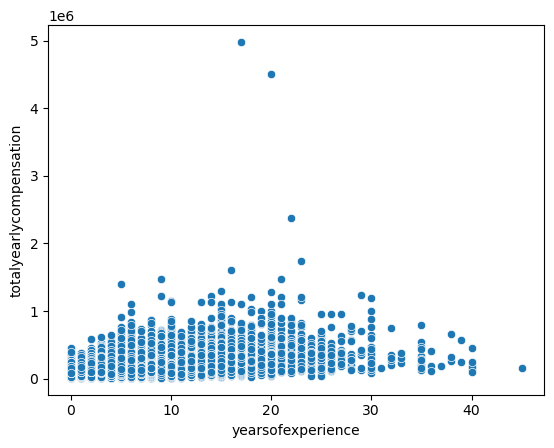

In [16]:
xval0 = widgets.Dropdown(options=df.columns, value='yearsofexperience', description='X Variable:')
yval0 = widgets.Dropdown(options=df.columns, value='totalyearlycompensation', description='Y Variable:')

display(xval0)
display(yval0)

sns.scatterplot(x=xval0.value, y=yval0.value, data=df)

In [14]:
# Do it, do it
def createScatter(x_col, y_col):
    sns.scatterplot(x=df[x_col], y=df[y_col]).set_title("Scatter Plot")

xval = widgets.Dropdown(options=df.columns, description='X Axis', value='yearsofexperience')
yval = widgets.Dropdown(options=df.columns, description='Y Axis', value='totalyearlycompensation')

interact(createScatter, x_col=xval, y_col=yval)


interactive(children=(Dropdown(description='X Axis', index=6, options=('timestamp', 'company', 'level', 'title…

<function __main__.createScatter(x_col, y_col)>

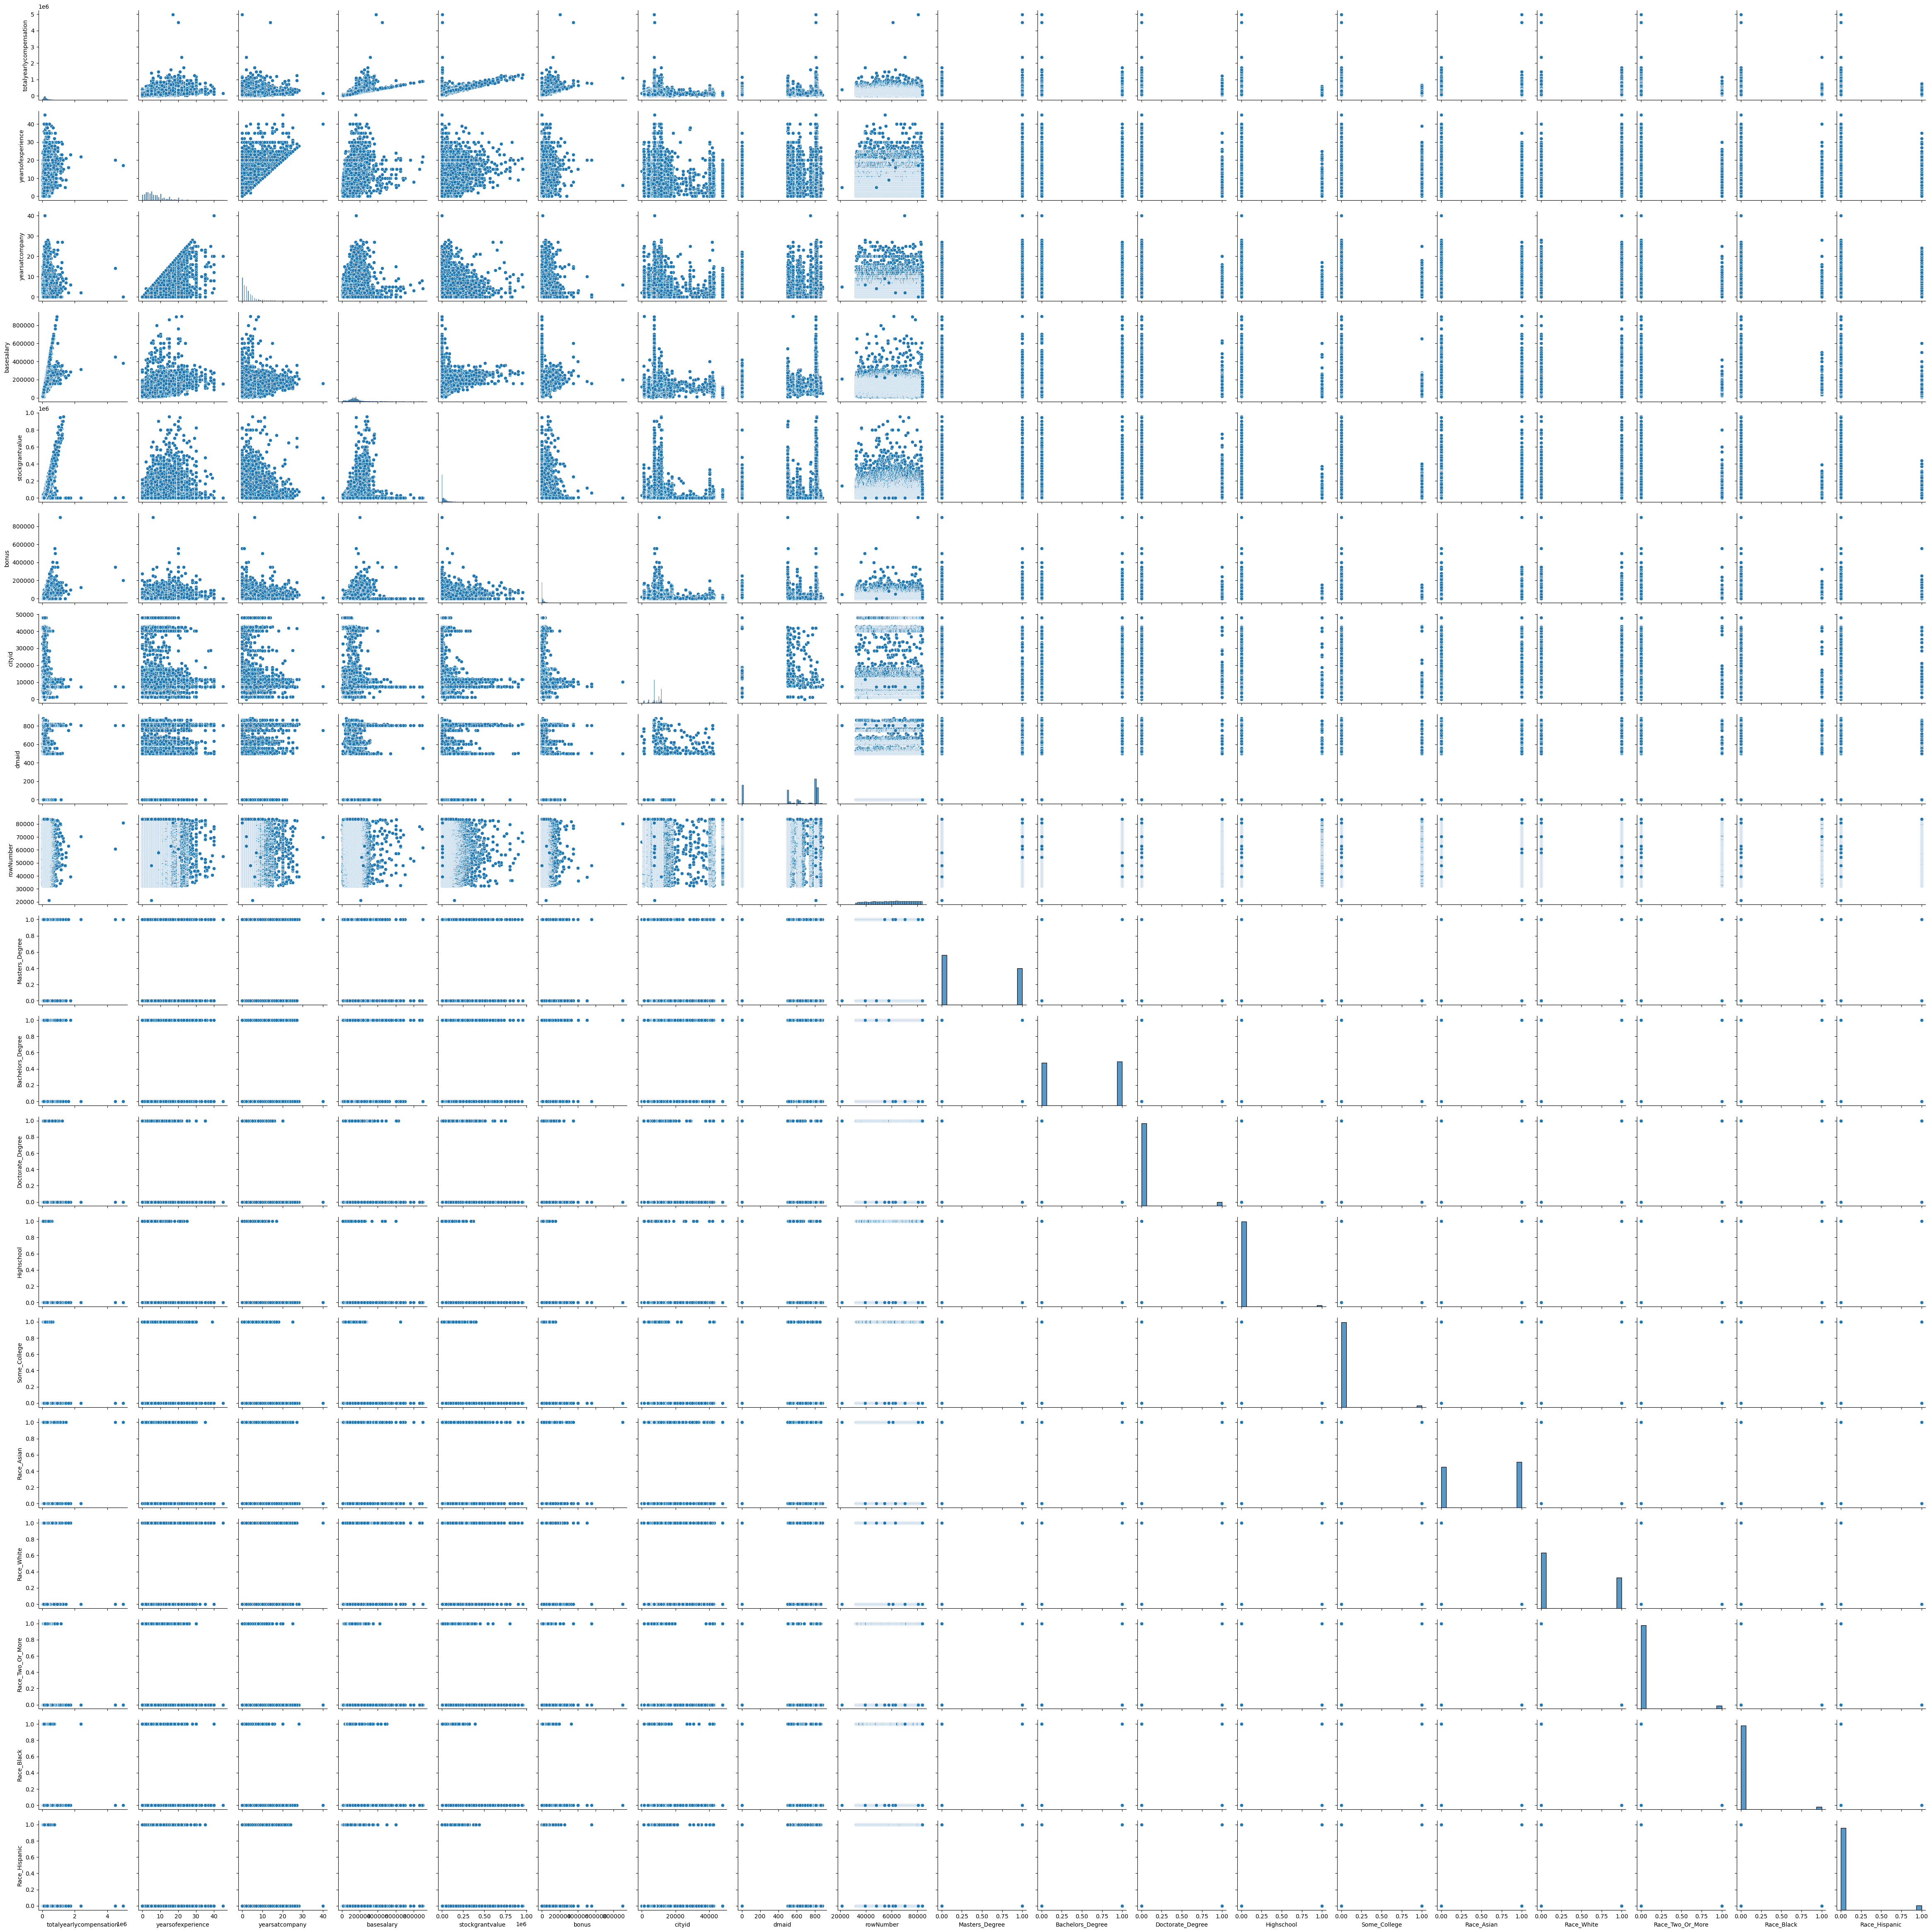

In [ ]:
sns.pairplot(df)

In [21]:
potential_cols = df.columns.tolist()

def filterCols(col):
    return df[col]

cols = widgets.SelectMultiple(options=potential_cols, description='Columns to keep:')
display(cols)

SelectMultiple(description='Columns to keep:', options=('timestamp', 'company', 'level', 'title', 'totalyearly…

('timestamp', 'company', 'level', 'title', 'totalyearlycompensation', 'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary', 'stockgrantvalue', 'bonus', 'gender')


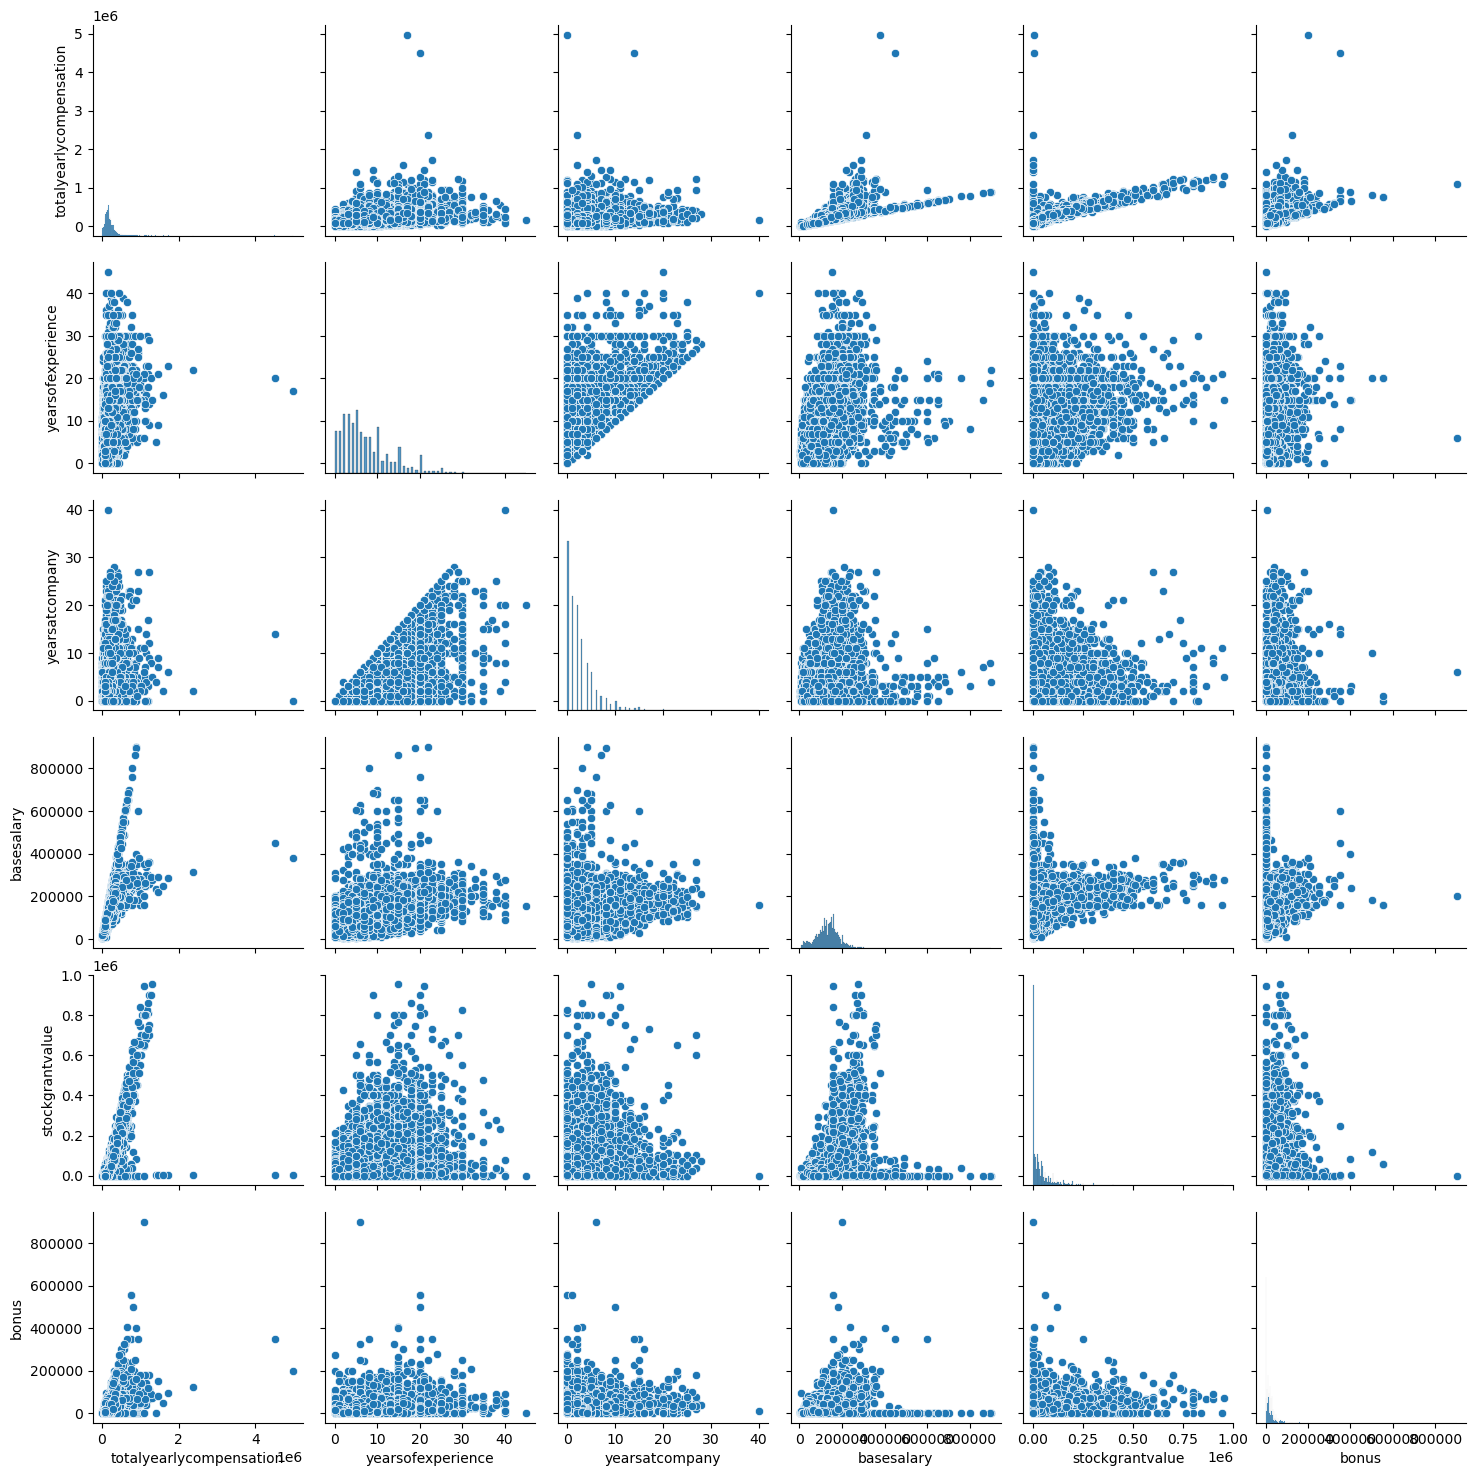

In [23]:
print(cols.value)
df_filt = df[list(cols.value)]
sns.pairplot(df_filt)
